This notebook produces figures for the sourmashconsumr pub (excluding new methods validation figures, which can be found in different notebooks).

# Notebook setup

In [1]:
remotes::install_github("Arcadia-Science/sourmashconsumr")

Skipping 1 packages not available: phyloseq



── R CMD build ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/private/var/folders/76/q53ldgh1667_lm49fpxybglc0000gn/T/Rtmp3dvCMq/remotes122f543d7f8c0/Arcadia-Science-sourmashconsumr-0cce8c9/DESCRIPTION’
─  preparing ‘sourmashconsumr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘sourmashconsumr_0.1.0.tar.gz’
   


In [2]:
library(sourmashconsumr)
library(dplyr)
library(ggplot2)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# adjust plot size rendered inline
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)

In [4]:
# up one directory out of notebooks for execution directory
setwd("..")

In [5]:
# use Arcadia brand font if present
if(file.exists("inputs/SuisseIntl-Regular.otf")){
  library(showtext)
  font_add("SuisseIntl", 
           regular = "inputs/SuisseIntl-Regular.otf",
           bold = "inputs/SuisseIntl-Bold.otf", 
           italic = "inputs/SuisseIntl-RegularItalic.otf")
  showtext::showtext_auto()
  theme_arcadia <- theme_classic() +
    theme(text = element_text(family = "SuisseIntl-Regular"))
} else {
  theme_arcadia <- theme_classic()
}

Loading required package: sysfonts

Loading required package: showtextdb



In [6]:
# load example data sets that are built into the package
data(gut_compare_df)
data(gut_signatures_df)
data(gut_gather_df)
data(gut_taxonomy_annotate_df)

In [7]:
# create a metadata data frame 
run_accessions <- c("SRR5936131", "SRR5947006", "SRR5935765",
                    "SRR5936197", "SRR5946923", "SRR5946920")
groups <- c("cd", "cd", "cd", "nonibd", "nonibd", "nonibd")
metadata <- data.frame(run_accessions = run_accessions, groups = groups) 

# Figures

## Signature: upset plot

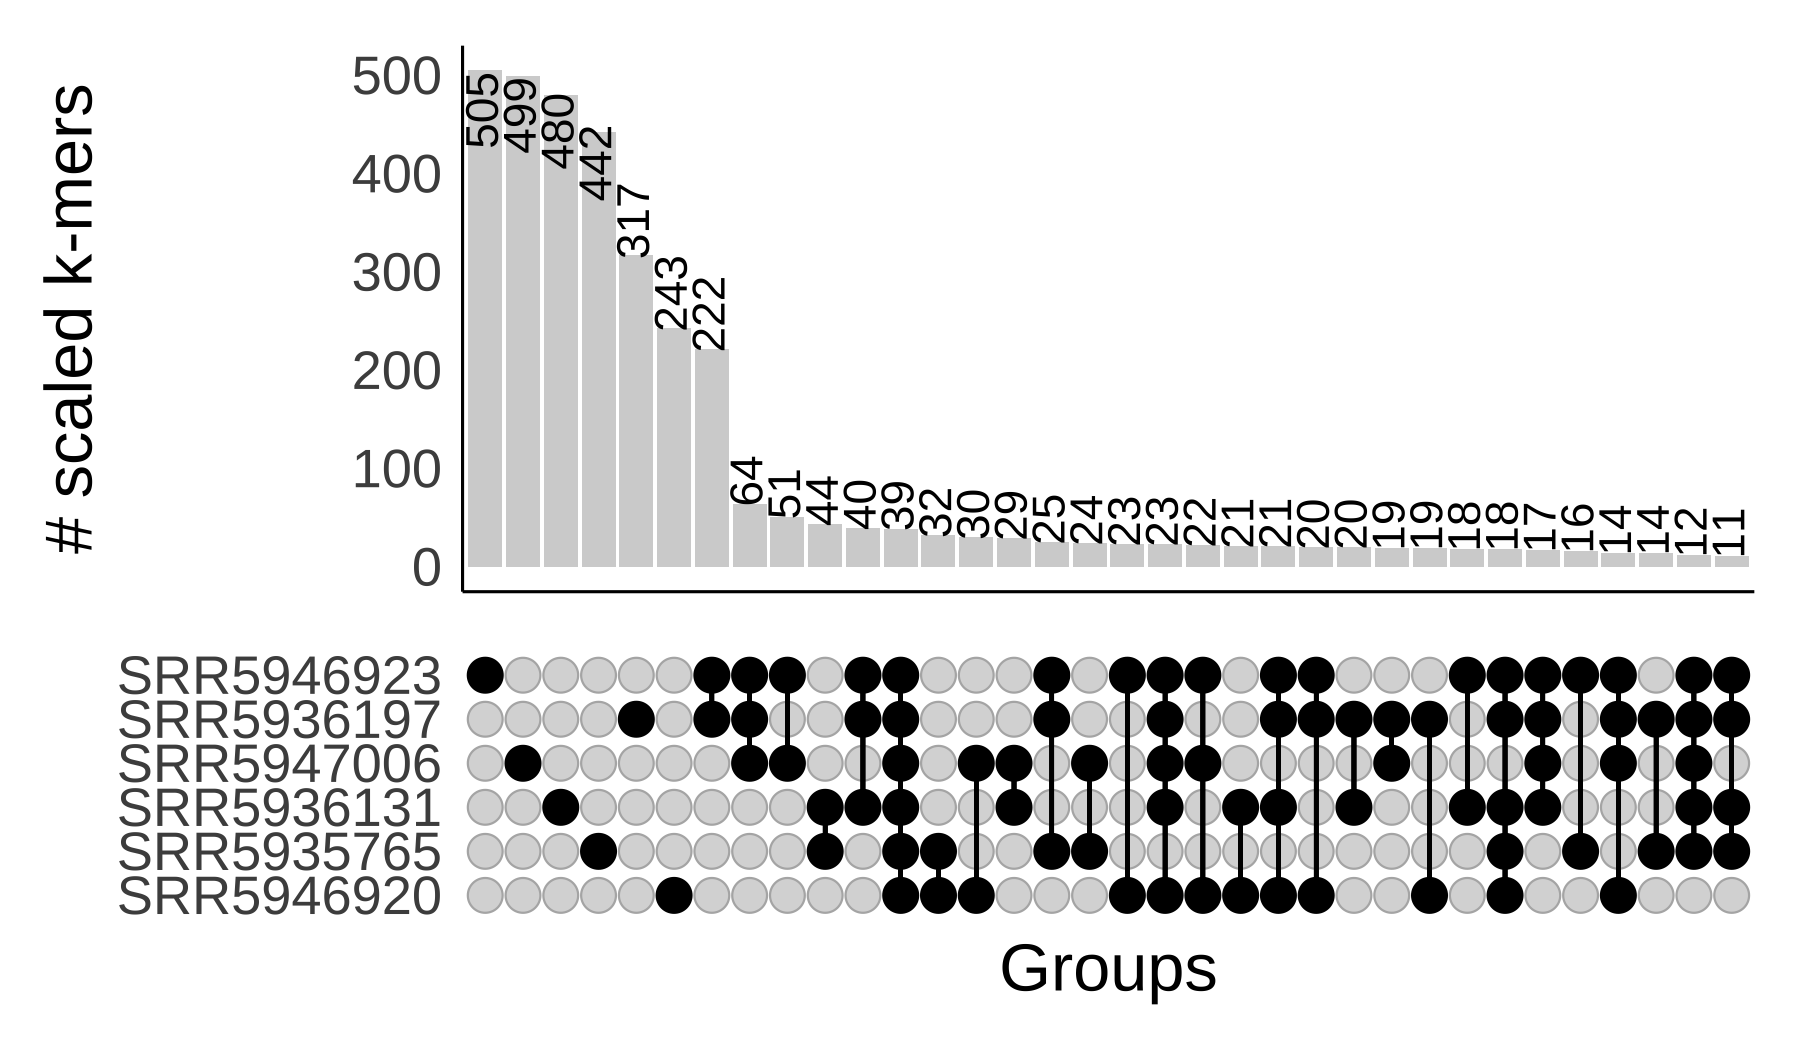

In [8]:
gut_signatures_df <- gut_signatures_df %>%
  dplyr::filter(ksize == 21)
gut_signatures_upset_df <- from_signatures_to_upset_df(signatures_df = gut_signatures_df)

# adjust plot size rendered inline
options(repr.plot.width = 6, repr.plot.height = 3.5, repr.plot.res = 300)
sig_upset_plt <- plot_signatures_upset(gut_signatures_upset_df, 
                                       stripes = c("white"), name = "Groups", min_size = 10,
                                       themes = ComplexUpset::upset_default_themes(text=element_text(size = 16),
                                                                                   axis.text.y = element_text(size = 13),
                                                                                   panel.grid = element_blank()))
sig_upset_plt

In [9]:
pdf("figures/fig2_sigupset.pdf", width = 5.75, height = 4)
sig_upset_plt
dev.off()
png("figures/fig2_sigupset.png", width = 5.75, height = 4, units = "in", res = 300)
sig_upset_plt
dev.off()
svg("figures/fig2_sigupset.svg", width = 5.75, height = 4)
sig_upset_plt
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

## Signature: accumulation curve

In [10]:
data(gut_signatures_df)
head(gut_signatures_df)

class,email,hash_function,filename,name,license,num,ksize,seed,max_hash,scaled,mins,md5sum,abundances,molecule,version
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,64547638983,7a9ad88ba612b735cf92313f05bbaf35,10,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,112703715466,7a9ad88ba612b735cf92313f05bbaf35,1,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,248407864107,7a9ad88ba612b735cf92313f05bbaf35,2,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,282779425292,7a9ad88ba612b735cf92313f05bbaf35,2,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,368292370495,7a9ad88ba612b735cf92313f05bbaf35,4,dna,0.4
sourmash_signature,,0.murmur64,SRR5935765_2.fastq.gz,SRR5935765,CC0,0,21,42,9.223372e+13,2e+05,500258584388,7a9ad88ba612b735cf92313f05bbaf35,8,dna,0.4


In [11]:
data(gut_signatures_df)
gut_signatures_df_k31 <- gut_signatures_df %>%
  dplyr::filter(ksize == 31)

In [12]:
rarefaction_df <- from_signatures_to_rarefaction_df(signatures_df = gut_signatures_df_k31)

In [13]:
# join the metadata data frame with the rarefaction_df
rarefaction_df <- rarefaction_df %>%
  dplyr::left_join(metadata, by = c("name" = "run_accessions"))

In [119]:
# calculate the average slope and minimum non-zero slope as an estimate for saturation
slope_df <- data.frame()
for(accession_i in unique(rarefaction_df$name)){
  rarefaction_accession_i <- rarefaction_df %>% 
    filter(name == accession_i)
  run_i <- diff(rarefaction_accession_i$num_kmers_sampled)
  rise_i <- diff(rarefaction_accession_i$num_kmers_observed)
  slope_i <- rise_i/run_i
  mean_slope_i <- mean(slope_i)
  slope_df_i <- data.frame(accession = accession_i,
                           mean_slope = mean_slope_i)
  slope_df <- bind_rows(slope_df, slope_df_i)
}

rarefaction_df <- left_join(rarefaction_df, slope_df, by = c("name" = "accession"))

In [122]:
head(rarefaction_df)

,name,num_kmers_sampled,num_kmers_observed,groups,mean_slope
,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,SRR5935765,1,1.000000,cd,0.0839304
2,SRR5935765,2,1.993401,cd,0.0839304
3,SRR5935765,3,2.980279,cd,0.0839304
4,SRR5935765,4,3.960713,cd,0.0839304
5,SRR5935765,5,4.934776,cd,0.0839304
6,SRR5935765,6,5.902544,cd,0.0839304


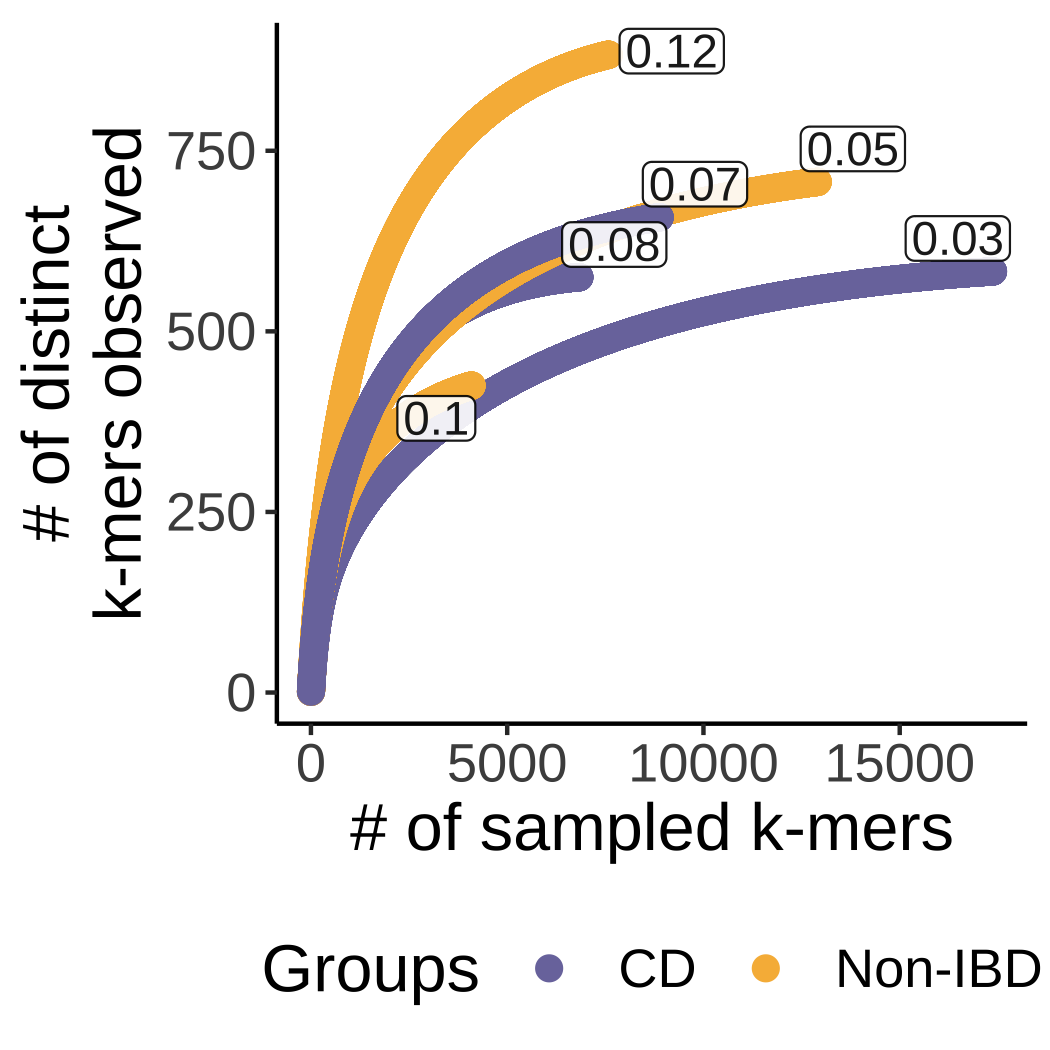

In [129]:
# adjust plot size rendered inline
options(repr.plot.width = 3.5, repr.plot.height = 3.5, repr.plot.res = 300)

# create and modify a plot
rarefaction_plt <- plot_signatures_rarefaction(rarefaction_df = rarefaction_df, fraction_of_points_to_plot = 1) +
  ggplot2::geom_point(ggplot2::aes(color = groups), size = 2.5) +
  scale_color_manual(values = c("#7A77AB", "#F7B846"),
                     labels = c("CD", "Non-IBD")) +
  theme(legend.position = "bottom",
        axis.text = element_text(size = 13),
        axis.title = element_text(size = 16),
        legend.text = element_text(size = 13), 
        legend.title = element_text(size = 16)) +
  labs(color = "Groups", x = "# of sampled k-mers", y = "# of distinct\nk-mers observed")

set.seed(1)
rarefaction_plt2 <- rarefaction_plt +
  ggrepel::geom_label_repel(data = rarefaction_df %>% group_by(name) %>% slice_max(order_by = num_kmers_observed),
                            aes(label = round(mean_slope, digits = 2)), 
                            alpha = .9, box.padding = 0.1, label.padding = 0.1, force = 3, size = 4)

rarefaction_plt2

In [128]:
pdf("figures/fig7_sigrare.pdf", width = 3.5, height = 3.5)
rarefaction_plt2
dev.off()
png("figures/fig7_sigrare.png", width = 3.5, height = 3.5, units = "in", res = 300)
rarefaction_plt2
dev.off()
svg("figures/fig7_sigrare.svg", width = 3.5, height = 3.5)
rarefaction_plt2
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

## Compare: MDS plot

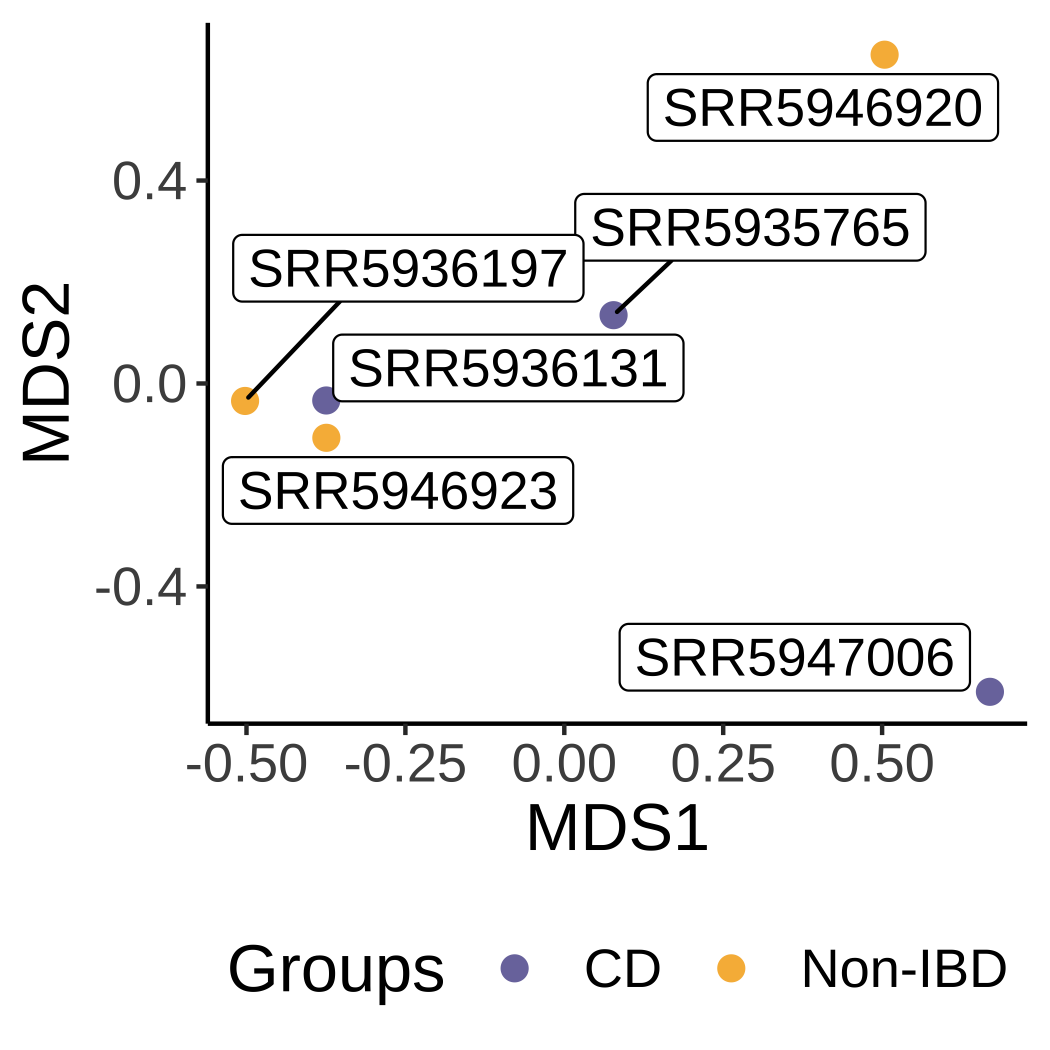

In [16]:
gut_compare_mds_df <- make_compare_mds(gut_compare_df) %>%
  left_join(metadata, by = c("sample" = "run_accessions"))

compare_plt <- plot_compare_mds(gut_compare_mds_df, label = F) +
  ggplot2::geom_point(ggplot2::aes(color = groups), size = 2.5) +
  ggrepel::geom_label_repel(size = 4.5) +
  scale_color_manual(values = c("#7A77AB", "#F7B846"),
                     labels = c("CD", "Non-IBD")) +
  theme(legend.position = "bottom",
        axis.text = element_text(size = 13),
        axis.title = element_text(size = 16),
        legend.text = element_text(size = 13), 
        legend.title = element_text(size = 16)) +
  labs(color = "Groups")

options(repr.plot.width = 3.5, repr.plot.height = 3.5, repr.plot.res = 300)
compare_plt

In [17]:
pdf("figures/fig3_mds.pdf", width = 3.5, height = 3.5)
compare_plt
dev.off()
png("figures/fig3_mds.png", width = 3.5, height = 3.5, units = "in", res = 300)
compare_plt
dev.off()
svg("figures/fig3_mds.svg", width = 3.5, height = 3.5)
compare_plt
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

## Compare: heatmap

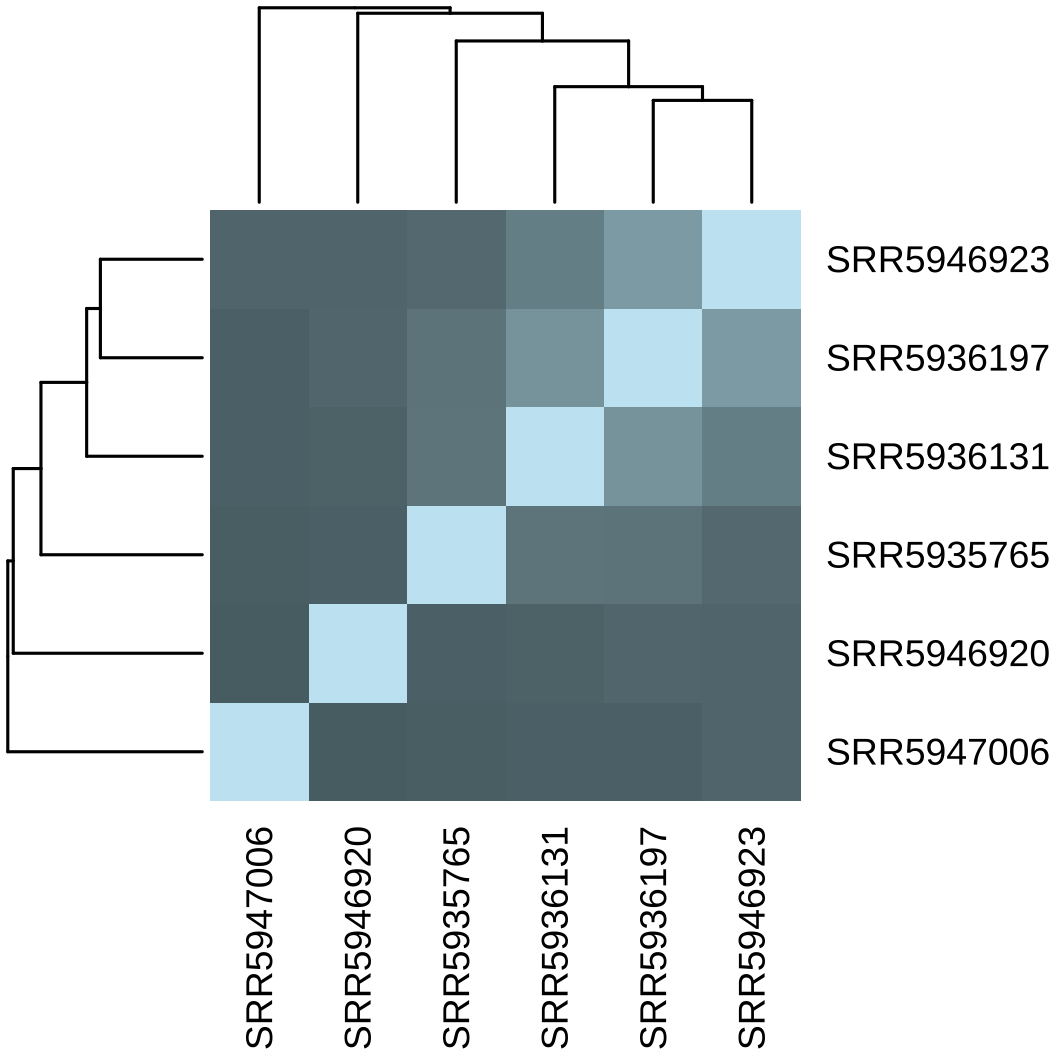

In [18]:
compare_heatmap <- plot_compare_heatmap(gut_compare_df, cexRow = .9, cexCol = .9,
                                        col = grDevices::colorRampPalette(c("#596F74", "#C6E7F4"))(n = 100))

In [19]:
pdf("figures/fig3_heatmap.pdf", width = 3.5, height = 3.5)
compare_heatmap <- plot_compare_heatmap(gut_compare_df, cexRow = .9, cexCol = .9,
                                        col = grDevices::colorRampPalette(c("#596F74", "#C6E7F4"))(n = 100))
dev.off()
png("figures/fig3_heatmap.png", width = 3.5, height = 3.5, units = "in", res = 300)
compare_heatmap <- plot_compare_heatmap(gut_compare_df, cexRow = .9, cexCol = .9,
                                        col = grDevices::colorRampPalette(c("#596F74", "#C6E7F4"))(n = 100))
dev.off()
svg("figures/fig3_heatmap.svg", width = 3.5, height = 3.5)
compare_heatmap <- plot_compare_heatmap(gut_compare_df, cexRow = .9, cexCol = .9,
                                        col = grDevices::colorRampPalette(c("#596F74", "#C6E7F4"))(n = 100))
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

## Gather: percent unclassified

In [20]:
gut_gather_df2 <- gut_gather_df %>% 
  dplyr::mutate(filename = gsub("gtdb-rs207.genomic-reps.dna.k31.zip", "GTDB rs207 reps", filename))

gather_unclassified_plt <- plot_gather_classified(gather_df = gut_gather_df2) +
  theme(legend.position = "bottom",
        axis.text = element_text(size = 13),
        axis.title = element_text(size = 16),
        legend.text = element_text(size = 13), 
        legend.title = element_text(size = 16)) +
  scale_fill_manual(values = c("#8A99AD", "#EBEDE8")) +
  guides(fill = guide_legend(nrow = 1, byrow = TRUE)) +
  labs(y = "Abundance-weighted\nfraction of query", x = "Query name", fill = "Database")

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


## Gather: upset plot

In [21]:
gut_gather_upset_df <- from_gather_to_upset_df(gather_df = gut_gather_df)
gather_upset_plt <- plot_gather_upset(upset_df = gut_gather_upset_df,
                                      # arguments to ComplexUpset::upset():
                                      stripes = c("white"), 
                                      name = "Groups", 
                                      min_size = 10,
                                      themes = ComplexUpset::upset_default_themes(text=element_text(size = 16),
                                                                                  axis.text.y = element_text(size = 13),
                                                                                  panel.grid = element_blank()))

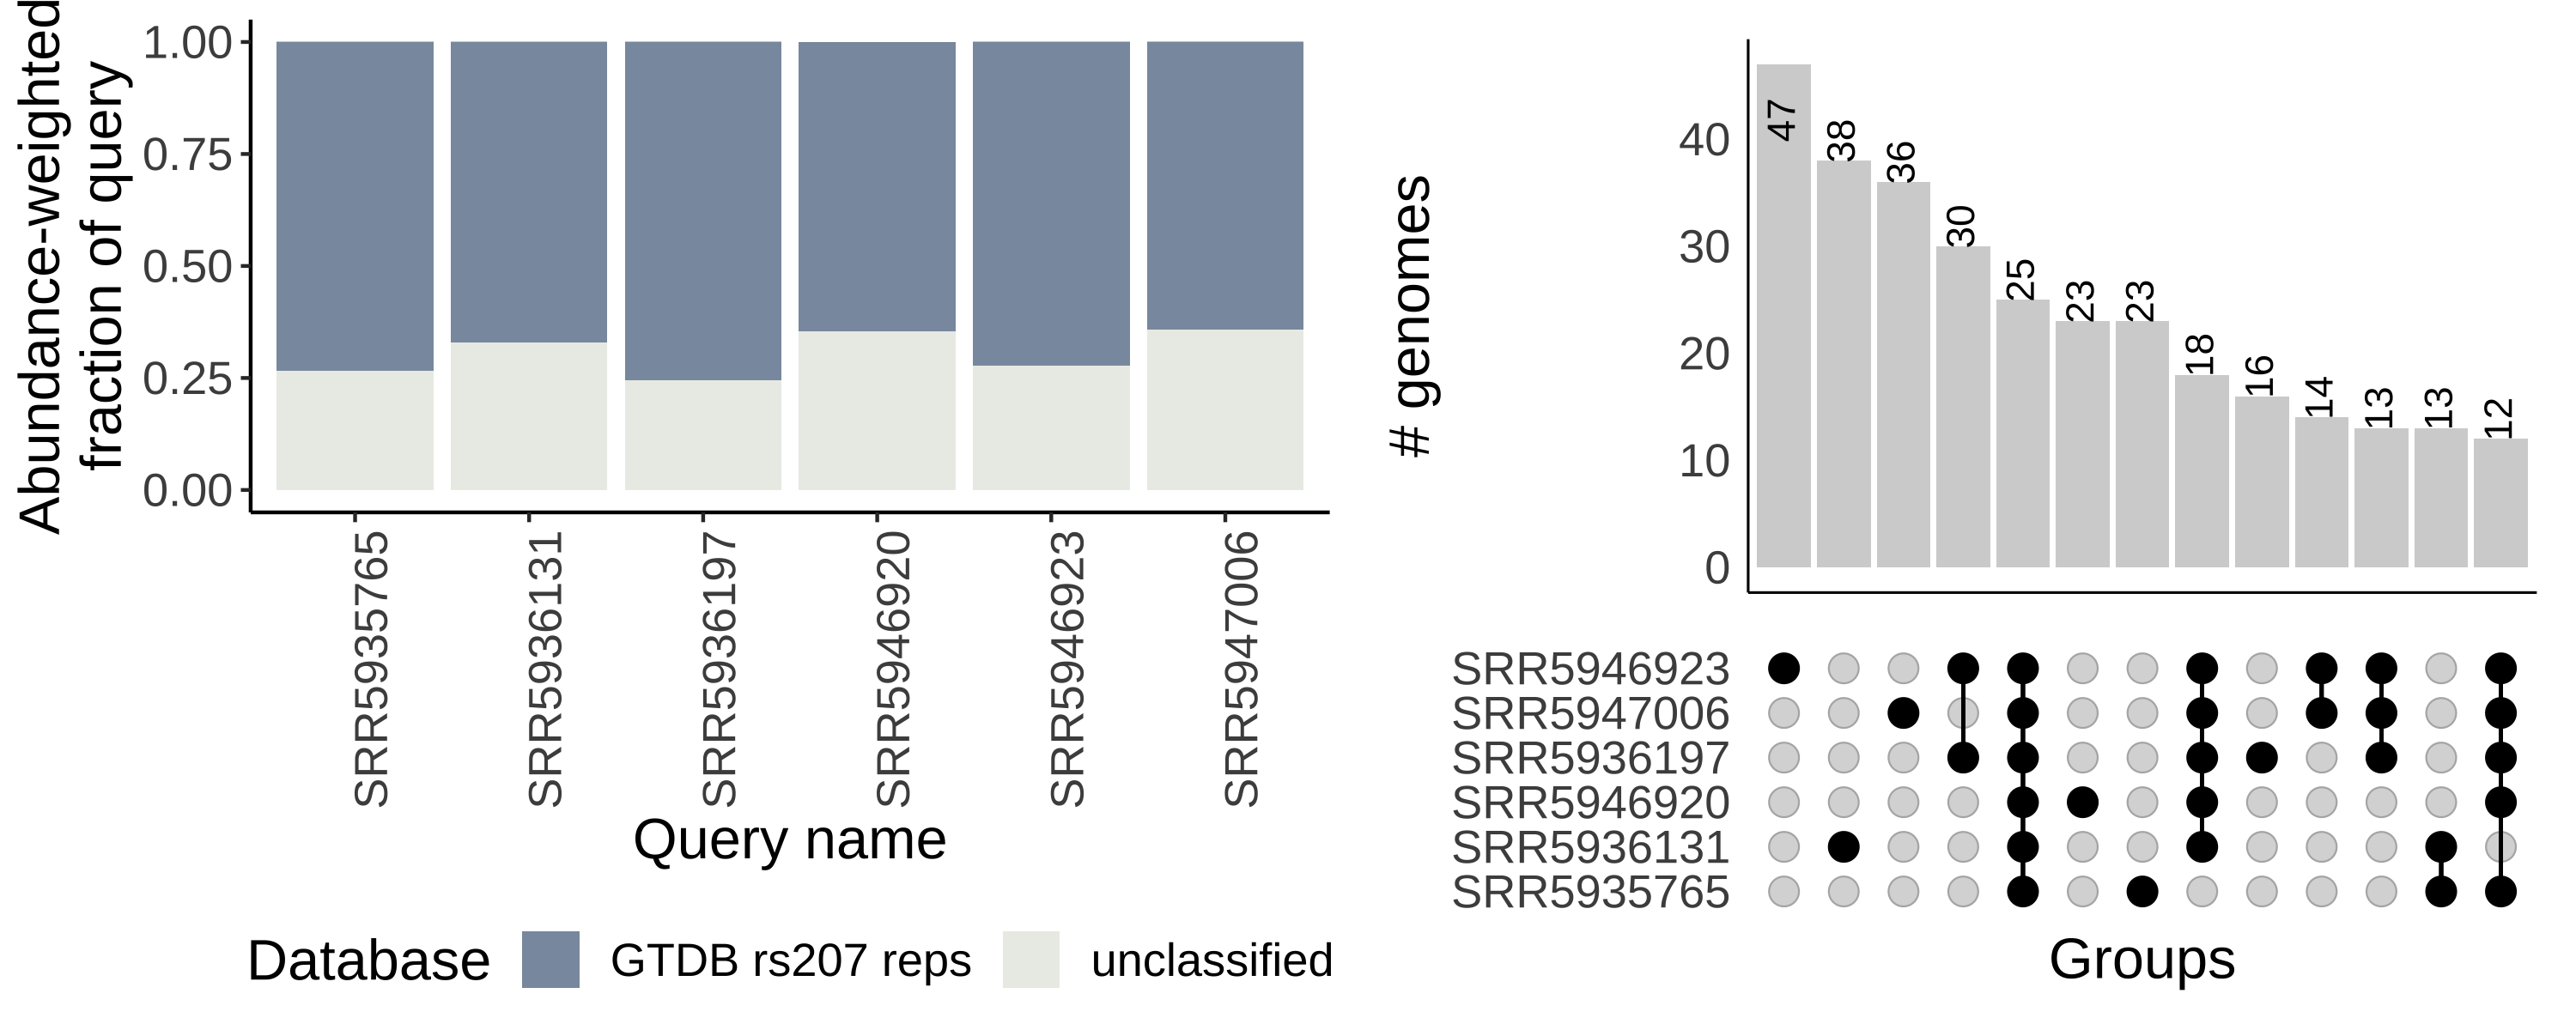

In [22]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 300)

gather_plt <- ggarrange(gather_unclassified_plt, gather_upset_plt, widths = c(1.1, 1))
gather_plt

In [23]:
pdf("figures/fig4_gather.pdf", width = 10, height = 4)
gather_plt
dev.off()
png("figures/fig4_gather.png", width = 10, height = 4, units = "in", res = 300)
gather_plt
dev.off()
svg("figures/fig4_gather.svg", width = 10, height = 4)
gather_plt
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

## Taxonomy: sankey

In [96]:
options(repr.plot.width = 8.5, repr.plot.height = 3, repr.plot.res = 300)

tax_sankey <- plot_taxonomy_annotate_sankey(taxonomy_annotate_df = gut_taxonomy_annotate_df %>%
                                            dplyr::filter(query_name == "SRR5935765"), 
                                            tax_glom_level = "order",
                                            # palette: 12-color ordered light (taupe #DAD3C7 removed for lack of contrast)
                                            palette = grDevices::colorRampPalette(c("#C6E7F4", "#F8C5C1", "#F5E4BE", "#B5BEA4", 
                                                                                    "#DCBFFC", "#B6C8D4", "#DA9085",
                                                                                    "#F5CBE4", "#BABEE0", "#D1EADF", "#F1E8DA"))(n = 11),
                                            label = F) +
  ggforce::geom_parallel_sets_labels(colour = 'black', angle = 360, size = 3, fontface = "italic", hjust = -0.25) +
  labs(x = "Taxonomic rank") +
  scale_x_continuous(labels = c("Domain", "Phylum", "Class", "Order", ""),
                     breaks = c(1, 2, 3, 4, 5),
                     limits = c(.75, 5)) +
  theme(axis.text = element_text(size = 13),
        axis.title = element_text(size = 16))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


## Taxonomy: ts alluvial

In [26]:
taxonomy_annotate_df <- read_taxonomy_annotate(Sys.glob("outputs/sourmash_taxonomy/day*csv"), intersect_bp_threshold = 50000)

In [27]:
time_df <- data.frame(query_name = unique(taxonomy_annotate_df$query_name),
                      time = c(15, 15.5, 16, 17, 17.5, 18, 19, 22, 22.5, 23, 24))

In [95]:
options(repr.plot.width = 8.5, repr.plot.height = 3, repr.plot.res = 300)

tax_alluvial <- plot_taxonomy_annotate_ts_alluvial(taxonomy_annotate_df = taxonomy_annotate_df,
                                                   time_df = time_df, 
                                                   tax_glom_level = "genus",
                                                   fraction_threshold = 0.01,
                                                   label = F, 
                                                   palette = c("#DA9085", "#F5E4BE", "#B5BEA4",
                                                               "#C6E7F4", "#DCBFFC", "#F5CBE4")) +
  ggalluvial::stat_alluvium(geom = "text", size = 3.5, decreasing = FALSE, fontface = "italic", min.y = 0.15) +
  scale_x_continuous(breaks = c(15, 16, 17, 18, 19, 22, 23, 24),
                     minor_breaks = c(15.5, 17.5, 22.5),
                     limits = c(14.5, 24.5)) +
  guides(fill=guide_legend(override.aes = list(color = NA, alpha = NA))) +
  labs(x = "Time", y = "Abundance-weighted\nfraction of query", fill = "Genus") +
  theme(axis.text = element_text(size = 13),
        axis.title = element_text(size = 16),
        legend.text = element_text(size = 13), 
        legend.title = element_text(size = 16))

## Taxonomy: upset

In [32]:
data(gut_taxonomy_annotate_df)
gut_taxonomy_upset_inputs <- from_taxonomy_annotate_to_upset_inputs(taxonomy_annotate_df = gut_taxonomy_annotate_df, 
                                                                    tax_glom_level = "order")

In [97]:
# 8 color light color palette
palette = c("#DA9085", "#F5E4BE", "#B5BEA4", "#C6E7F4", "#DCBFFC", "#F8C5C1", "#F1E8DA", "#B6C8D4")
tax_upset <- plot_taxonomy_annotate_upset(upset_inputs = gut_taxonomy_upset_inputs, 
                                          fill = "phylum", 
                                          palette = palette,
                                          # arguments to ComplexUpset::upset():
                                          stripes = c("white"), 
                                          name = "Groups", 
                                          themes = ComplexUpset::upset_default_themes(text=element_text(size = 16),
                                                                                      axis.text.y = element_text(size = 13),
                                                                                      panel.grid = element_blank(),
                                                                                      legend.text = element_text(face = "italic"))) 

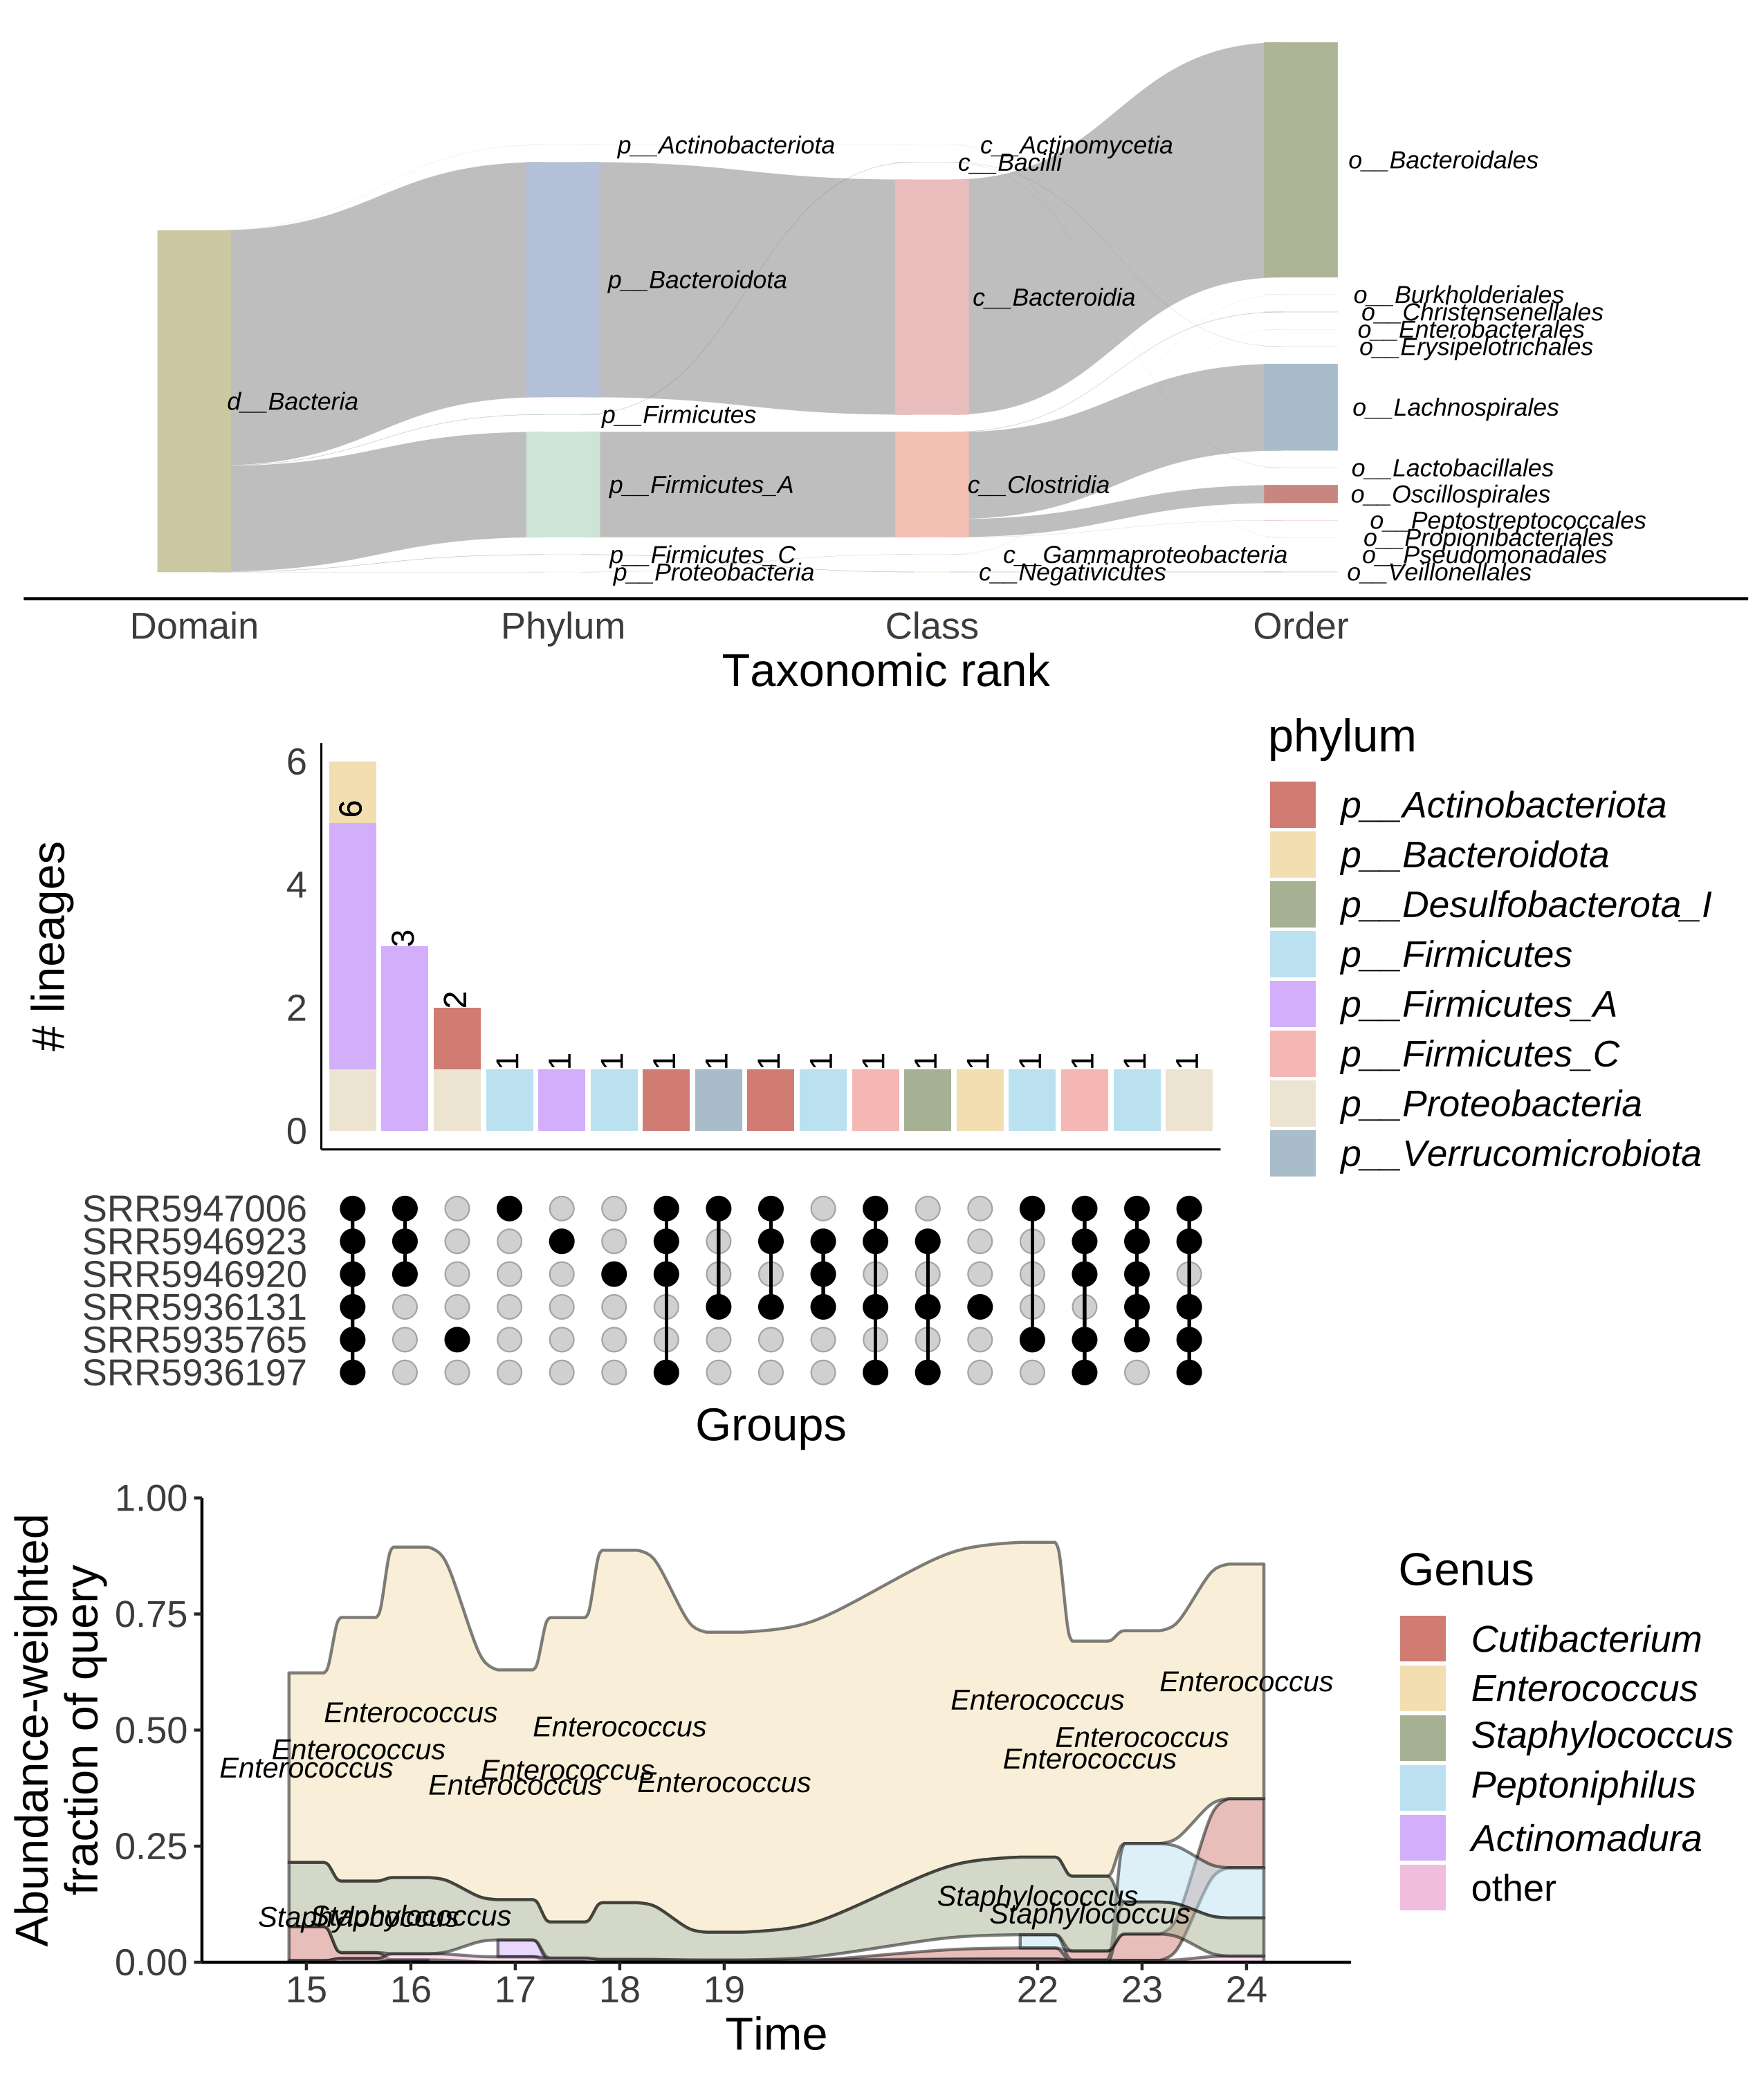

In [100]:
options(repr.plot.width = 8.5, repr.plot.height = 10, repr.plot.res = 300)

tax_plt <- ggarrange(tax_sankey, tax_upset, tax_alluvial, 
                     ncol = 1, nrow = 3, heights = c(1.2, 1.3, 1))

tax_plt

In [101]:
pdf("figures/fig5_tax.pdf", width = 8.5, height = 10)
tax_plt
dev.off()
png("figures/fig5_tax.png", width = 8.5, height = 10, units = "in", res = 300)
tax_plt
dev.off()
svg("figures/fig5_tax.svg", width = 8,5, height = 10)
tax_plt
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

## Convert to: phyloseq (skipped)

## Convert to: metacoder

In [78]:
gut_metacoder <- from_taxonomy_annotate_to_metacoder(taxonomy_annotate_df = gut_taxonomy_annotate_df, 
                                                     intersect_bp_threshold = 50000, 
                                                     tax_glom_level = "order",
                                                     groups = metadata)


Summing per-taxon counts from 6 columns for 43 taxa

Calculating number of samples with a value greater than 0 for 6 columns in 2 groups for 43 observations



In [84]:
# calculate differential abundance table. warnings can be ignored.
gut_metacoder$data$diff_table <- metacoder::compare_groups(gut_metacoder, data = "tax_abund",
                                                           cols = metadata$run_accessions,
                                                           groups = metadata$groups)

Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(abund_1, abund_2):
“cannot compute exact p-value with ties”
Warning me

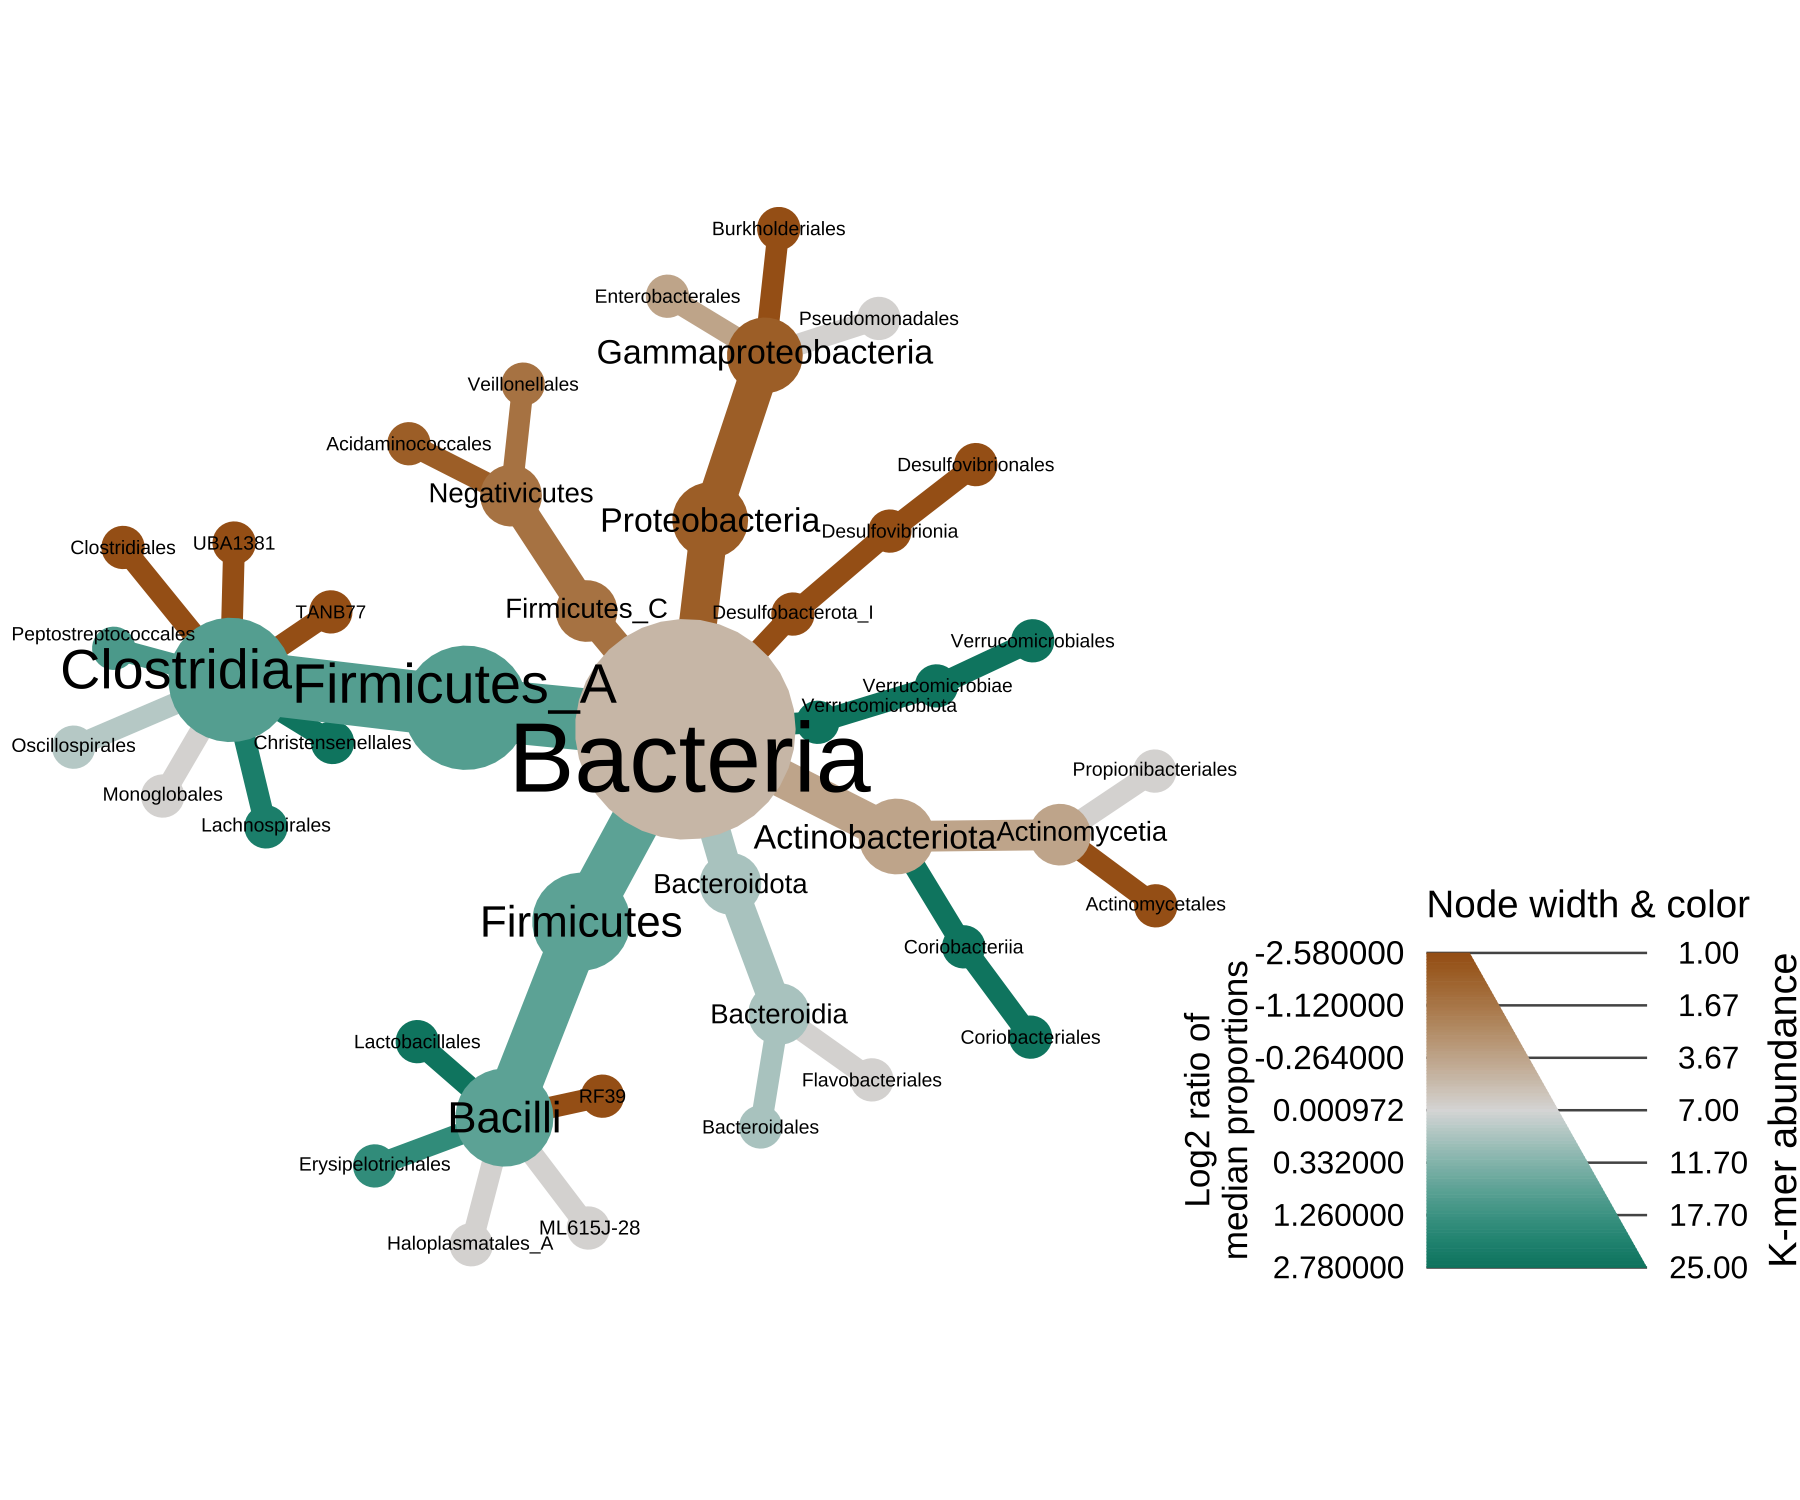

In [102]:
# generate a heat_tree plot with taxa from all samples, agglomerated to the order level
# show differential abundance results as color
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 300)

set.seed(1) # This makes the plot appear the same each time it is run 
metacoder_plt <- metacoder::heat_tree(gut_metacoder, 
                                      node_label = taxon_names,
                                      node_color = log2_median_ratio,
                                      node_color_range = metacoder::diverging_palette(),
                                      node_size = n_obs,
                                      node_size_axis_label = "K-mer abundance",
                                      node_legend_title = "Node width & color",
                                      node_color_axis_label = "Log2 ratio of\nmedian proportions",
                                      layout = "davidson-harel", # The primary layout algorithm
                                      initial_layout = "reingold-tilford") # Node location algorithm 

metacoder_plt

In [103]:
pdf("figures/fig6_metacoder.pdf", width = 10, height = 4)
metacoder_plt
dev.off()
png("figures/fig6_metacoder.png", width = 10, height = 4, units = "in", res = 300)
metacoder_plt
dev.off()
svg("figures/fig6_metacoder.svg", width = 10, height = 4)
metacoder_plt
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2